In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

churn_data = pd.read_csv(r"D:\DOWNLOAD\Machine Learning\SUpervised ML\DecesionTree\customer_churn-2.csv")

In [3]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
churn_data['TotalCharges']=pd.to_numeric(churn_data['TotalCharges'], errors='coerce')

In [7]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# MISSING VALUE ANALYSIS

In [8]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
churn_data.shape

(7043, 21)

In [10]:
churn_data.dropna(inplace=True)

In [11]:
churn_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
churn_data.shape

(7032, 21)

In [13]:
churn_data.drop(columns = ['customerID'],inplace = True)

In [14]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Feature Selection


We are going to implement chi-square test to select the irrelevant features
Chi-Square test is normally done on Categorical data(object) ,where we will select each independent attribute and calculating chi-Square statistics value with the help of observed value and expected value.

if observed and expected values are close then we'll have high chi-square statistics.(high chi-square stats implies attributes are highly independent) if observed and expected values are far then we'll have less chi-square statistics.(less chi-square stats implies attributes are not independent)

With the above concept we'll set null and alternative hypothesis and check for its acceptance or rejection through p-value and alpha value (significance value)

if p -value > alpha value ,we reject null hypothesis if p-value < alpha value ,we accept null hypothesis

In [15]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency


In [16]:
pd.crosstab(churn_data['gender'],churn_data['Churn']).values

array([[2544,  939],
       [2619,  930]], dtype=int64)

In [17]:
###Chisq Test for Independence for all object fields
col_list = list(churn_data.columns)
col_list.remove('Churn')
df=pd.DataFrame(columns=['Feature','P-value'])
print(col_list)
for col in col_list:
    if churn_data[[col]][col].dtype == 'object': 

        ###Chisq Test for Independence
        dataset_table=pd.crosstab(churn_data[col],churn_data['Churn'])
        #print(dataset_table)


        #Observed Values
        Observed_Values = dataset_table.values 
        #print("Observed Values :-\n",Observed_Values)

        val=chi2_contingency(dataset_table)
        #val

        Expected_Values=val[3]
        #Expected_Values

        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]

        no_of_rows=len(dataset_table.iloc[0:2,0])
        no_of_columns=len(dataset_table.iloc[0,0:2])
        ddof=(no_of_rows-1)*(no_of_columns-1)
        #print("Degree of Freedom:-",ddof)
        alpha = 0.05
        #print("chi-square statistic:-",chi_square_statistic)
        #scipy.stats.chi2.ppf() function

        critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        #print('critical_value:',critical_value)

        #p-value
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        #print(col)
        #print('p-value:',p_value)
        df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
        #print('Significance level: ',alpha)
        #print('Degree of Freedom: ',ddof)
        #print('p-value:',p_value)
        #df.append()
df

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


C:\Users\ss\AppData\Local\Temp\ipykernel_15348\3532024537.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
C:\Users\ss\AppData\Local\Temp\ipykernel_15348\3532024537.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
C:\Users\ss\AppData\Local\Temp\ipykernel_15348\3532024537.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append({'Feature':col, 'P-value': p_value}, ignore_index=True)
C:\Users\ss\AppData\Local\Temp\ipykernel_15348\3532024537.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

,Feature,P-value
0,gender,0.473665
1,Partner,0.0
2,Dependents,0.0
3,PhoneService,0.326886
4,MultipleLines,0.000787
5,InternetService,0.0
6,OnlineSecurity,0.0
7,OnlineBackup,0.0
8,DeviceProtection,0.0
9,TechSupport,0.0


In [18]:
churn_data.drop(columns = ['gender'],inplace = True)

In [19]:
churn_data.drop(columns = ['PhoneService'],inplace = True)

In [20]:
churn_data.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

# Label Encoding

In [21]:
churn_data['Partner'] = churn_data['Partner'].map({'Yes': 1, 'No': 0})
churn_data['Dependents'] = churn_data['Dependents'].map({'Yes': 1, 'No': 0})
churn_data['MultipleLines']=churn_data['MultipleLines'].map({'No phone service':0, 'No': 1, "Yes": 2})
churn_data['InternetService']=churn_data['InternetService'].map({'DSL':0, 'Fiber optic':1, 'No':2})
churn_data['OnlineSecurity']=churn_data['OnlineSecurity'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['OnlineBackup']=churn_data['OnlineBackup'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['DeviceProtection']=churn_data['DeviceProtection'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['TechSupport']=churn_data['TechSupport'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingTV']=churn_data['StreamingTV'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['StreamingMovies']=churn_data['StreamingMovies'].map({'Yes':1, 'No':0, 'No internet service':2})
churn_data['Contract']=churn_data['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2})
churn_data['PaperlessBilling']=churn_data['PaperlessBilling'].map({'Yes':1, 'No':0})
churn_data['PaymentMethod']=churn_data['PaymentMethod'].map({'Electronic check':1, 'Mailed check':0, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})


In [22]:
churn_data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,No
1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,0,56.95,1889.50,No
2,0,0,0,2,1,0,1,1,0,0,0,0,0,1,0,53.85,108.15,Yes
3,0,0,0,45,0,0,1,0,1,1,0,0,1,0,2,42.30,1840.75,No
4,0,0,0,2,1,1,0,0,0,0,0,0,0,1,1,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,1,0,1,1,1,1,1,1,0,84.80,1990.50,No
7039,0,1,1,72,2,1,0,1,1,0,1,1,1,1,3,103.20,7362.90,No
7040,0,1,1,11,0,0,1,0,0,0,0,0,0,1,1,29.60,346.45,No
7041,1,1,0,4,2,1,0,0,0,0,0,0,0,1,0,74.40,306.60,Yes


# Data Visualization

In [24]:
ax.patches[1].get_height()

NameError: name 'ax' is not defined

In [ ]:
import matplotlib.pyplot as plt
ax = churn_data["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

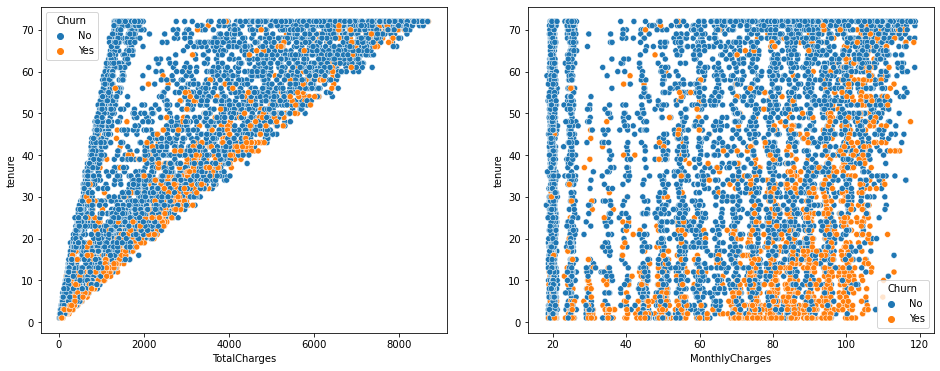

In [25]:
import seaborn as sns
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[0])
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=churn_data, ax=ax[1])

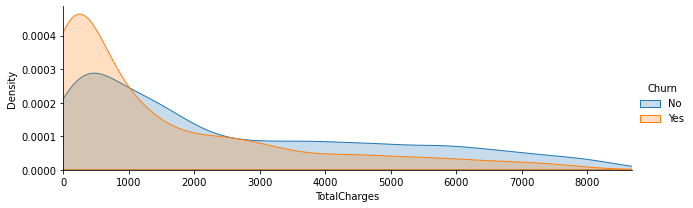

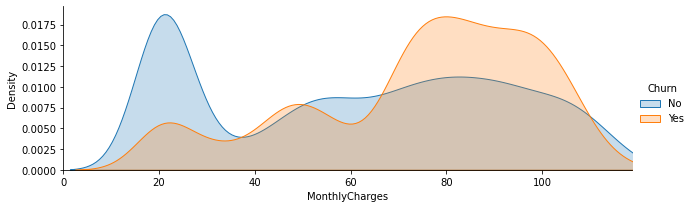

In [26]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"TotalCharges",shade= True)
facet.set(xlim=(0, churn_data["TotalCharges"].max()))
facet.add_legend()

facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"MonthlyCharges",shade= True)
facet.set(xlim=(0, churn_data["MonthlyCharges"].max()))
facet.add_legend()

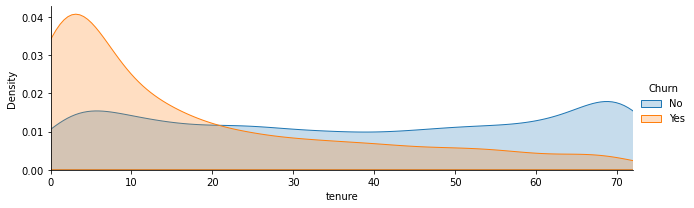

In [27]:
facet = sns.FacetGrid(churn_data, hue = "Churn", aspect = 3)
facet.map(sns.kdeplot,"tenure",shade= True)
facet.set(xlim=(0, churn_data["tenure"].max()))
facet.add_legend()

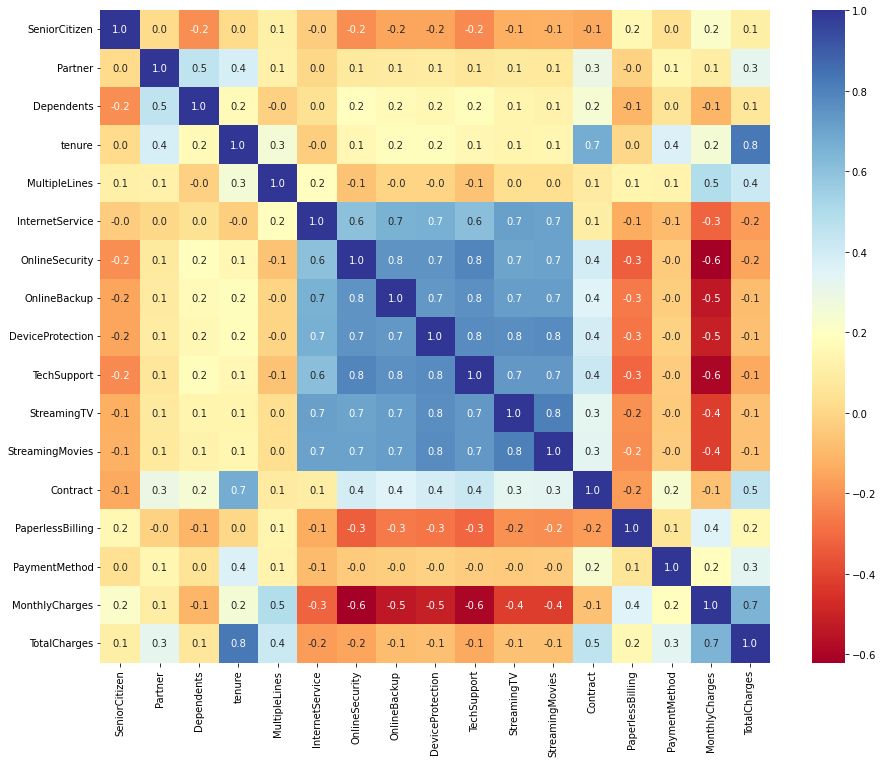

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 12))
sns.heatmap(churn_data.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

# MODEL BUILDING

In [29]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})

In [30]:
X = churn_data.iloc[:, :-1].values
y = churn_data.iloc[:, -1].values

In [31]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)



In [33]:
rf1=rf.fit(x_train,y_train) 

In [34]:
y_pred=rf1.predict(x_test)

In [35]:
accuracy_score(rf1.predict(x_train),y_train)

0.9971555555555556

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7839374555792467

# Hyper parameter tuning

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]    #default=True :Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [38]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf2=rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [39]:
rf2.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [40]:
y_pred=rf2.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7967306325515281

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(rf2.predict(x_train),y_train)

0.8552888888888889

In [45]:
rf2.cv_results_

{'mean_fit_time': array([ 8.4653012 , 33.06911031, 22.6936725 , 31.50783348, 18.76322524,
        12.26194604, 18.89027214, 11.18009265, 19.36524916, 30.6650157 ,
         5.64657195, 12.79523396, 26.01927002, 20.84831937, 11.36125557,
        25.8627278 , 10.23838592, 14.71351282, 34.49733035, 10.78530471,
        37.7175444 , 32.59469414, 18.15563226, 26.35359303, 26.35759886,
         7.61516905, 28.5770127 , 14.69085042, 31.48913773, 19.52663509,
        20.31208825, 13.17845647, 14.18860126, 11.46900813, 28.06109953,
        16.23492058, 18.44674579, 12.24513491, 11.54032509, 14.94473855,
         2.54399633,  7.19689067,  9.35811893,  4.6190029 ,  2.89316138,
        12.36513432, 23.86894155,  5.30347411, 16.86484885,  9.49362914,
        35.60248216, 30.75989739, 13.40595357, 14.38810078, 22.73559936,
         8.37340879, 19.38330404, 23.26591285, 18.47940779, 15.33571664,
         2.63395206,  4.61967039, 13.58862241, 17.54534062, 18.88738839,
        18.76712616, 24.07105811, 

# Model Evaluation

In [46]:
importance = rf1.feature_importances_

In [47]:
importance= pd.Series(importance)
importance

0     0.022110
1     0.022763
2     0.020210
3     0.159143
4     0.025974
5     0.022008
6     0.038735
7     0.028005
8     0.023810
9     0.041591
10    0.019668
11    0.020940
12    0.095651
13    0.025034
14    0.051460
15    0.183004
16    0.199894
dtype: float64

In [48]:
df=pd.DataFrame(columns=['Feature','Importance'])

In [49]:
df

,Feature,Importance


In [50]:

col_list.remove('gender')
col_list.remove('PhoneService')

In [51]:
col_list

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [52]:
df['Feature']=col_list

In [53]:
df

,Feature,Importance
0,SeniorCitizen,NaN
1,Partner,NaN
2,Dependents,NaN
3,tenure,NaN
4,MultipleLines,NaN
5,InternetService,NaN
6,OnlineSecurity,NaN
7,OnlineBackup,NaN
8,DeviceProtection,NaN
9,TechSupport,NaN


In [54]:
df['Importance']=importance

In [55]:
df

,Feature,Importance
0,SeniorCitizen,0.022110
1,Partner,0.022763
2,Dependents,0.020210
3,tenure,0.159143
4,MultipleLines,0.025974
5,InternetService,0.022008
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
8,DeviceProtection,0.023810
9,TechSupport,0.041591


In [56]:
df.sort_values(by='Importance', ascending=False)

,Feature,Importance
16,TotalCharges,0.199894
15,MonthlyCharges,0.183004
3,tenure,0.159143
12,Contract,0.095651
14,PaymentMethod,0.051460
9,TechSupport,0.041591
6,OnlineSecurity,0.038735
7,OnlineBackup,0.028005
4,MultipleLines,0.025974
13,PaperlessBilling,0.025034


<AxesSubplot:xlabel='Feature', ylabel='Importance'>

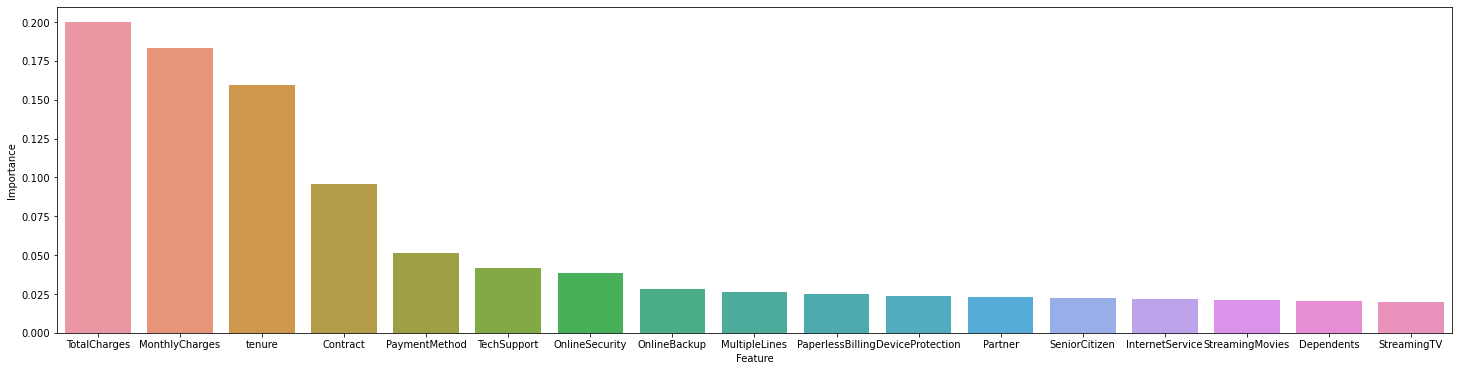

In [57]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(25,6))
# make barplot and sort bars
sns.barplot(x='Feature',y="Importance",data=df, order=df.sort_values('Importance', ascending=False).Feature)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.64      0.50      0.56       369

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407

